In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
a = 998
b = 1998
c = -999
d = -1999
h = 1 / 10000
l = 1
x = np.arange(0, l, h)
u_0 = -3
v_0 = 5
solution = np.zeros((x.size, 2))
solution[0] = np.array([u_0, v_0])
f = lambda u, v: np.array([u * a + b * v, u * c + d * v])


def exact_solution(x):
    u = 2 * (u_0 + v_0) * np.exp(-x) + (-u_0 - 2 * v_0) * np.exp(-1000 * x)
    v = - (u_0 + v_0) * np.exp(-x) - (-u_0 - 2 * v_0) * np.exp(-1000 * x)
    return np.array([u, v])

# Явная схема

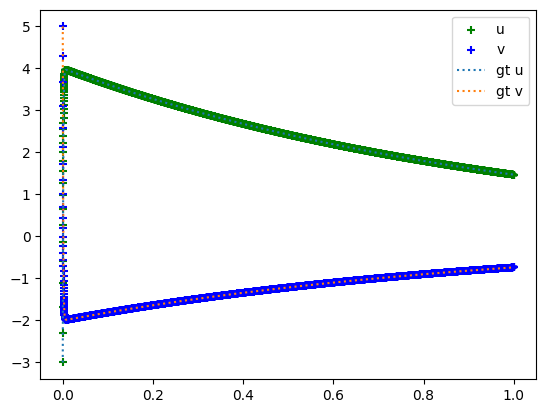

In [18]:
for i in range(x.size - 1):
    solution[i + 1] = solution[i] + h * f(*solution[i])
u = solution[:, 0]
v = solution[:, 1]
plt.scatter(x, u, c='g', label='u', marker="+")
plt.scatter(x, v, c='b', label='v', marker="+")
plt.plot(x, exact_solution(x)[0], ':', label='gt u')
plt.plot(x, exact_solution(x)[1], ':', label='gt v')
plt.legend(loc='upper right')
plt.show()

# Неявная схема

In [19]:
implicit_solution = np.zeros((x.size, 2))
implicit_solution[0] = np.array([u_0, v_0])

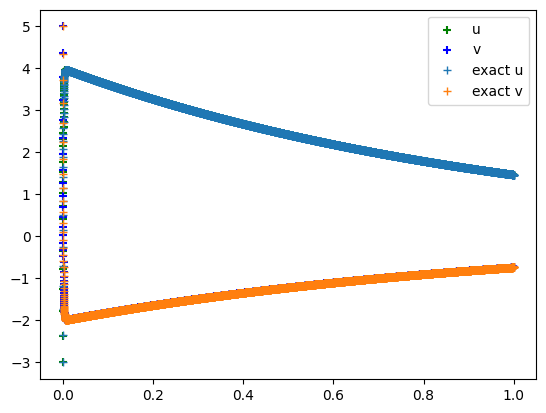

In [20]:
for i in range(x.size - 1):
    J = np.array([[a, b], [c, d]])
    E = np.eye(2)
    mat = np.linalg.inv(E / h - J)
    implicit_solution[i + 1] = implicit_solution[i] + np.dot(mat, f(*implicit_solution[i]))
implicit_u = implicit_solution[:, 0]
implicit_v = implicit_solution[:, 1]
plt.scatter(x, implicit_u, c='g', label='u', marker="+")
plt.scatter(x, implicit_v, c='b', label='v', marker="+")
plt.plot(x, exact_solution(x)[0], "+", label='exact u')
plt.plot(x, exact_solution(x)[1], "+", label='exact v')
plt.legend(loc='upper right')
plt.show()